In [1]:
import os
import pandas as pd                                    # panda's nickname is pd
import numpy as np                                     # numpy as np
from pandas import DataFrame, Series                   # for convenience
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import time
import plotly.plotly as ply
import json
from fbprophet import Prophet

In [2]:

list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19_issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN

In [5]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value

In [6]:
#Create a Data frame from issues to get CLosed and Create Days and dates

data_frame2 = issues_df[['Author','issue_number','closed_at','created_at']]
data_frame2.loc[0:2, 'Closed_on']= np.NaN
data_frame2.loc[0:4,'Created_on']= np.NaN

for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['closed_at']:
        closed_date_obj = datetime.strptime(wrangled_issues_df.iloc[i]['closed_at'], "%Y-%m-%d")
        weekday =  closed_date_obj.strftime("%A")
        data_frame2.loc[i,'Closed_on'] = weekday
        data_frame2.loc[i,'closed_at'] = pd.to_datetime(wrangled_issues_df.iloc[i]['closed_at'])
    if wrangled_issues_df.iloc[i]['created_at']:
        created_date_obj = datetime.strptime(wrangled_issues_df.iloc[i]['created_at'], "%Y-%m-%d")
        weekday = created_date_obj.strftime("%A")
        data_frame2.loc[i,'Created_on'] = weekday
        data_frame2.loc[i,'created_at'] = pd.to_datetime(wrangled_issues_df.iloc[i]['created_at'])

c:\users\chaet\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\users\chaet\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [7]:
data_frame2.head()

,Author,issue_number,closed_at,created_at,Closed_on,Created_on
0,DSP19SCM782,491,None,2019-04-21 00:00:00,NaN,Sunday
1,DSP19SCM782,490,None,2019-04-21 00:00:00,NaN,Sunday
2,DSP19SCM781,489,None,2019-04-21 00:00:00,NaN,Sunday
3,DSP19SCM781,488,None,2019-04-21 00:00:00,NaN,Sunday
4,DSP19SCM781,487,None,2019-04-21 00:00:00,NaN,Sunday


In [8]:
# # Pull request and Commit data

# list_of_pull_request_dict_data = [json.loads(line) for line in open('SPM587SP19pulls.json')]
# list_of_commits_dict_data = [json.loads(line) for line in open('SPM587SP19commits.json')]

## FB Prophet API use

In [9]:
def Prophet_ModelForecast(input_df):
    model = Prophet()
    model.fit(input_df)
    future_df = model.make_future_dataframe(periods=365)
    future_df.tail()
    forecast = model.predict(future_df)

    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
    plt.figure(figsize=(15, 8), dpi=80)
    fig1 = model.plot(forecast)
    fig2 = model.plot_components(forecast)

In [10]:
DF_Createdata = data_frame2['created_at'].value_counts().rename_axis('ds').reset_index(name='y').sort_index()

## Created Date Data

c:\users\chaet\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.
c:\users\chaet\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



<Figure size 1200x640 with 0 Axes>

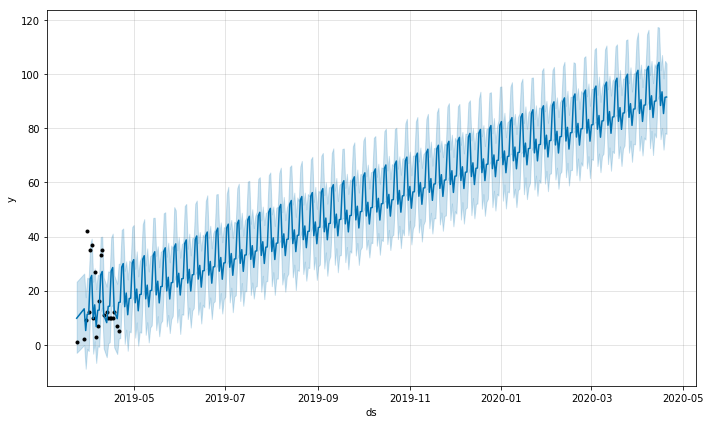

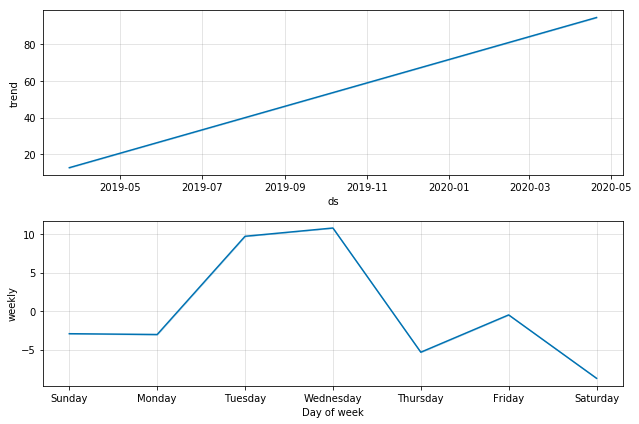

In [11]:
Prophet_ModelForecast(DF_Createdata)

## Closed Date Data

In [12]:
DF_CLoseddata = data_frame2['Closed_on'].value_counts().rename_axis('ds').reset_index(name='y').sort_index()

In [13]:
DF_CLoseddata = DataFrame(data_frame2['closed_at'].value_counts().sort_index()).reset_index()
DF_CLoseddata.columns = ['ds','y']
DF_CLoseddata

,ds,y
0,2019-03-31,25
1,2019-04-01,12
2,2019-04-02,34
3,2019-04-03,34
4,2019-04-04,14
5,2019-04-05,15
6,2019-04-06,3
7,2019-04-07,14
8,2019-04-08,16
9,2019-04-09,28


c:\users\chaet\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.0.


<Figure size 1200x640 with 0 Axes>

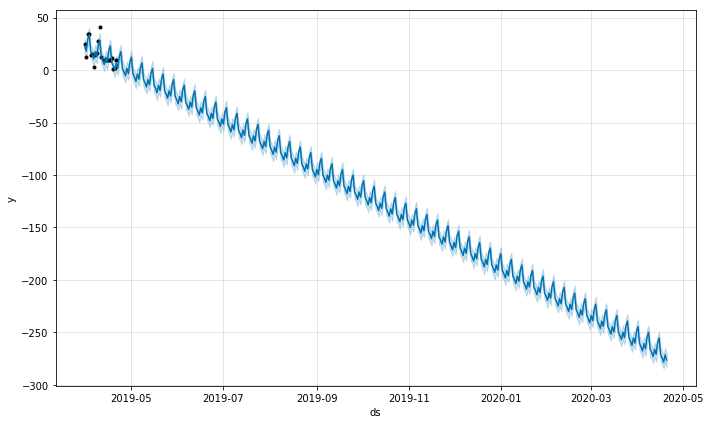

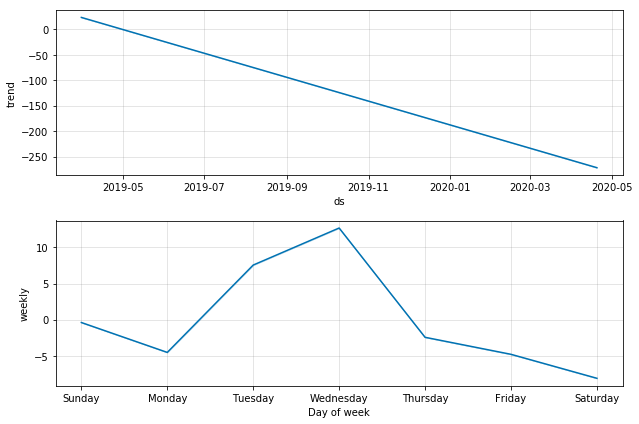

In [14]:
Prophet_ModelForecast(DF_CLoseddata)

## Pull request data



In [15]:
pull_request_dict_data = [json.loads(line) for line in open('SPM587SP19_pulls.json')]

In [16]:
pull_requests_df = DataFrame(pull_request_dict_data)

In [17]:
PullRequestsbyCRD = DataFrame(pull_requests_df['created_at'].value_counts().sort_index()).reset_index()
PullRequestsbyCRD.columns = ['ds','y']


In [18]:
PullRequestsbyCRD

,ds,y
0,2019-03-28,1
1,2019-04-01,1
2,2019-04-02,25
3,2019-04-03,25
4,2019-04-04,15
5,2019-04-05,5
6,2019-04-06,4
7,2019-04-07,6
8,2019-04-08,6
9,2019-04-09,22


c:\users\chaet\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.


<Figure size 1200x640 with 0 Axes>

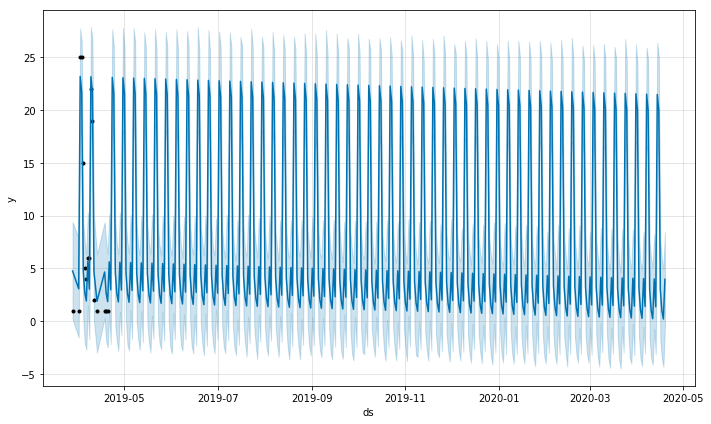

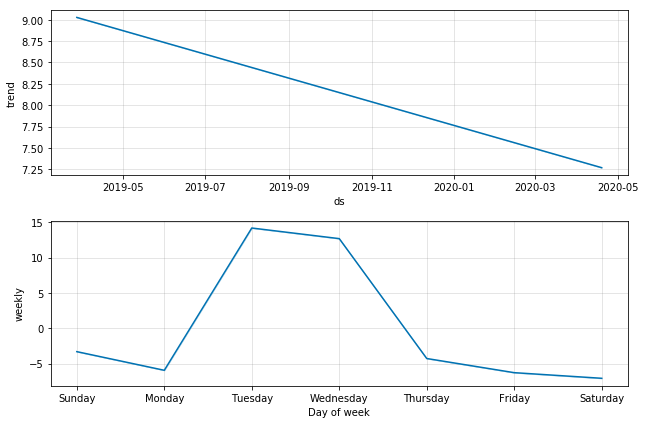

In [19]:
Prophet_ModelForecast(PullRequestsbyCRD)

## Commit request data


In [20]:
commits_dict_data = [json.loads(line) for line in open('SPM587SP19_commits.json')]

In [21]:
commits_df = DataFrame(commits_dict_data)

In [22]:
CommitsbyCreateDate = pd.DataFrame(columns=['ds', 'y'])

for i in range(len(commits_df)):
    data =  commits_df.iloc[i]['created_at']
    CommitsbyCreateDate.loc[i,'ds'] = datetime.strptime(data, '%Y-%m-%dT%H:%M:%SZ').date()

CommitsbyCreateDate = (CommitsbyCreateDate['ds'].value_counts().sort_index()).reset_index()
CommitsbyCreateDate.columns = ['ds','y']

In [23]:
CommitsbyCreateDate.head()

,ds,y
0,2019-03-24,3
1,2019-03-27,1
2,2019-03-28,15
3,2019-03-29,27
4,2019-04-01,2


c:\users\chaet\anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.0.


<Figure size 1200x640 with 0 Axes>

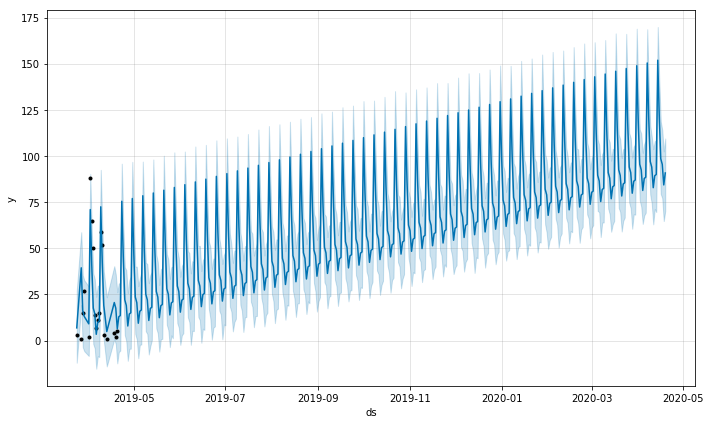

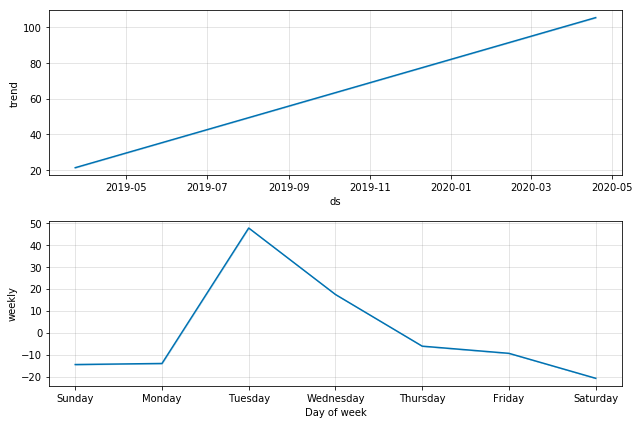

In [24]:
Prophet_ModelForecast(CommitsbyCreateDate)